# Libraries

In [2]:
import pandas as pd
import seaborn as sns
import numpy as np

import matplotlib
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

import zipfile

plt.style.use('ggplot')

matplotlib.rcParams['figure.figsize'] = (12, 8)

# Functions

In [3]:
def calculate_missing_percentage(df):
    for col in df.columns:
        pct_missing = np.mean(df[col].isnull())
        print('{} - {}%'.format(col, round(pct_missing*100, 2)))

In [ ]:
# Function for extracting month value from column 'released' and create 'month' column

def get_month(released, released_date):
    if pd.notnull(released_date):
        return pd.to_datetime(released_date).month
    elif pd.notnull(released):
        if len(released.split()) == 2:
            month_str = released.split()[0]
            return pd.to_datetime(month_str, format='%B').month
        else:
            return 10
    else:
        return 1

# Loading data

In [52]:
!kaggle datasets download -d danielgrijalvas/movies

Dataset URL: https://www.kaggle.com/datasets/danielgrijalvas/movies
License(s): CC0-1.0




  0%|          | 0.00/424k [00:00<?, ?B/s]
100%|██████████| 424k/424k [00:00<00:00, 825kB/s]
100%|██████████| 424k/424k [00:00<00:00, 825kB/s]


In [53]:
with zipfile.ZipFile('movies.zip') as f:
    f.extractall()  

In [54]:
movies = pd.read_csv('movies.zip')

# Exploratory Data Analysis

In [55]:
movies.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0


In [9]:
movies.describe()

,year,score,votes,budget,gross,runtime
count,7668.000000,7665.000000,7.665000e+03,5.497000e+03,7.479000e+03,7664.000000
mean,2000.405451,6.390411,8.810850e+04,3.558988e+07,7.850054e+07,107.261613
std,11.153508,0.968842,1.633238e+05,4.145730e+07,1.657251e+08,18.581247
min,1980.000000,1.900000,7.000000e+00,3.000000e+03,3.090000e+02,55.000000
25%,1991.000000,5.800000,9.100000e+03,1.000000e+07,4.532056e+06,95.000000
50%,2000.000000,6.500000,3.300000e+04,2.050000e+07,2.020576e+07,104.000000
75%,2010.000000,7.100000,9.300000e+04,4.500000e+07,7.601669e+07,116.000000
max,2020.000000,9.300000,2.400000e+06,3.560000e+08,2.847246e+09,366.000000


In [10]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7668 entries, 0 to 7667
Data columns (total 15 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   name      7668 non-null   object 
 1   rating    7591 non-null   object 
 2   genre     7668 non-null   object 
 3   year      7668 non-null   int64  
 4   released  7666 non-null   object 
 5   score     7665 non-null   float64
 6   votes     7665 non-null   float64
 7   director  7668 non-null   object 
 8   writer    7665 non-null   object 
 9   star      7667 non-null   object 
 10  country   7665 non-null   object 
 11  budget    5497 non-null   float64
 12  gross     7479 non-null   float64
 13  company   7651 non-null   object 
 14  runtime   7664 non-null   float64
dtypes: float64(5), int64(1), object(9)
memory usage: 898.7+ KB


In [11]:
movies.shape

(7668, 15)

## Missing data

In [12]:
calculate_missing_percentage(movies)

name - 0.0%
rating - 1.0%
genre - 0.0%
year - 0.0%
released - 0.03%
score - 0.04%
votes - 0.04%
director - 0.0%
writer - 0.04%
star - 0.01%
country - 0.04%
budget - 28.31%
gross - 2.46%
company - 0.22%
runtime - 0.05%


### copy of df

In [13]:
df = movies.copy()

We do not have any addiational informations about budget in the dataset, so i need to change it into numerical column.


In [14]:
df[df['budget'].isnull()]

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
16,Fame,R,Drama,1980,"May 16, 1980 (United States)",6.6,21000.0,Alan Parker,Christopher Gore,Eddie Barth,United States,NaN,21202829.0,Metro-Goldwyn-Mayer (MGM),134.0
19,Stir Crazy,R,Comedy,1980,"December 12, 1980 (United States)",6.8,26000.0,Sidney Poitier,Bruce Jay Friedman,Gene Wilder,United States,NaN,101300000.0,Columbia Pictures,111.0
24,Urban Cowboy,PG,Drama,1980,"June 6, 1980 (United States)",6.4,14000.0,James Bridges,Aaron Latham,John Travolta,United States,NaN,46918287.0,Paramount Pictures,132.0
25,Altered States,R,Horror,1980,"December 25, 1980 (United States)",6.9,33000.0,Ken Russell,Paddy Chayefsky,William Hurt,United States,NaN,19853892.0,Warner Bros.,102.0
26,Little Darlings,R,Comedy,1980,"March 21, 1980 (United States)",6.5,5100.0,Ron Maxwell,Kimi Peck,Tatum O'Neal,United States,NaN,34326249.0,Stephen Friedman/Kings Road Productions,96.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7657,Leap,NaN,Drama,2020,"September 25, 2020 (United States)",6.7,903.0,Peter Ho-Sun Chan,Ji Zhang,Gong Li,China,NaN,25818882.0,NaN,135.0
7659,I Am Fear,Not Rated,Horror,2020,"March 3, 2020 (United States)",3.4,447.0,Kevin Shulman,Kevin Shulman,Kristina Klebe,United States,NaN,13266.0,Roxwell Films,87.0
7660,Aloha Surf Hotel,NaN,Comedy,2020,"November 5, 2020 (United States)",7.1,14.0,Stefan C. Schaefer,Stefan C. Schaefer,Augie Tulba,United States,NaN,NaN,Abominable Pictures,90.0
7664,Dream Round,NaN,Comedy,2020,"February 7, 2020 (United States)",4.7,36.0,Dusty Dukatz,Lisa Huston,Michael Saquella,United States,NaN,NaN,Cactus Blue Entertainment,90.0


Replacing null values with - 5 = to have number value but different than 'real' values

In [15]:
df['budget'] = df['budget'].fillna(-5)

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7668 entries, 0 to 7667
Data columns (total 15 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   name      7668 non-null   object 
 1   rating    7591 non-null   object 
 2   genre     7668 non-null   object 
 3   year      7668 non-null   int64  
 4   released  7666 non-null   object 
 5   score     7665 non-null   float64
 6   votes     7665 non-null   float64
 7   director  7668 non-null   object 
 8   writer    7665 non-null   object 
 9   star      7667 non-null   object 
 10  country   7665 non-null   object 
 11  budget    7668 non-null   float64
 12  gross     7479 non-null   float64
 13  company   7651 non-null   object 
 14  runtime   7664 non-null   float64
dtypes: float64(5), int64(1), object(9)
memory usage: 898.7+ KB


Delete rows with missing values in selected columns

The rest of columns with nulls - rating, released, score, votes, writer, star, country, gross, company, runtime - sum of null rows wyith this data it's 3,3%.

In [17]:
df_nulls_columns = ['rating', 'released', 'score', 'votes', 'writer', 'star', 'country', 'gross', 'company', 'runtime']

In [18]:
df =  df.dropna(subset=df_nulls_columns)

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7412 entries, 0 to 7659
Data columns (total 15 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   name      7412 non-null   object 
 1   rating    7412 non-null   object 
 2   genre     7412 non-null   object 
 3   year      7412 non-null   int64  
 4   released  7412 non-null   object 
 5   score     7412 non-null   float64
 6   votes     7412 non-null   float64
 7   director  7412 non-null   object 
 8   writer    7412 non-null   object 
 9   star      7412 non-null   object 
 10  country   7412 non-null   object 
 11  budget    7412 non-null   float64
 12  gross     7412 non-null   float64
 13  company   7412 non-null   object 
 14  runtime   7412 non-null   float64
dtypes: float64(5), int64(1), object(9)
memory usage: 926.5+ KB


In [20]:
df[['score', 'votes']]

,score,votes
0,8.4,927000.0
1,5.8,65000.0
2,8.7,1200000.0
3,7.7,221000.0
4,7.3,108000.0
...,...,...
7651,6.8,42000.0
7652,6.8,3700.0
7653,5.4,2400.0
7656,5.0,294.0


In [21]:
df[['votes', 'budget', 'gross', 'runtime']] = df[['votes', 'budget', 'gross', 'runtime']].astype('int64')

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7412 entries, 0 to 7659
Data columns (total 15 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   name      7412 non-null   object 
 1   rating    7412 non-null   object 
 2   genre     7412 non-null   object 
 3   year      7412 non-null   int64  
 4   released  7412 non-null   object 
 5   score     7412 non-null   float64
 6   votes     7412 non-null   int64  
 7   director  7412 non-null   object 
 8   writer    7412 non-null   object 
 9   star      7412 non-null   object 
 10  country   7412 non-null   object 
 11  budget    7412 non-null   int64  
 12  gross     7412 non-null   int64  
 13  company   7412 non-null   object 
 14  runtime   7412 non-null   int64  
dtypes: float64(1), int64(5), object(9)
memory usage: 926.5+ KB


'relaeased' columm

In [23]:
df.groupby('country')['released'].count()

country
Argentina                            6
Aruba                                1
Australia                           85
Austria                              5
Belgium                              8
Brazil                               6
Canada                             181
Chile                                2
China                               35
Colombia                             1
Czech Republic                       8
Denmark                             31
Federal Republic of Yugoslavia       2
Finland                              3
France                             255
Germany                            114
Greece                               1
Hong Kong                           39
Hungary                              3
Iceland                              2
India                               58
Indonesia                            2
Iran                                 8
Ireland                             42
Israel                               4
Italy            

In [24]:
df.groupby(['year'])['released'].count()

year
1980     80
1981    103
1982    118
1983    127
1984    155
1985    177
1986    182
1987    186
1988    191
1989    186
1990    189
1991    195
1992    189
1993    195
1994    198
1995    196
1996    198
1997    196
1998    194
1999    193
2000    193
2001    197
2002    200
2003    197
2004    199
2005    200
2006    199
2007    199
2008    199
2009    200
2010    197
2011    199
2012    199
2013    200
2014    200
2015    196
2016    199
2017    199
2018    199
2019    180
2020     13
Name: released, dtype: int64

The information as year and country are already in separete columns, so we need to get rid of it.

In [25]:
df['released'] = df['released'].apply(lambda x: x.split(' (')[0])

In [26]:
df['released']

0           June 13, 1980
1            July 2, 1980
2           June 20, 1980
3            July 2, 1980
4           July 25, 1980
              ...        
7651    February 21, 2020
7652      August 28, 2020
7653       April 17, 2020
7656         June 3, 2020
7659        March 3, 2020
Name: released, Length: 7412, dtype: object

### Extract data from 'released' column

In [27]:
df['released_date'] = pd.to_datetime(df['released'], errors='coerce')

Some number of rows does not have completed date type, but just year or year/month set, the month (except a few cases) could be subtracted. The lack of month could be implemented by most common month - 10th month

In [28]:
df['released_date'].dt.month.value_counts()

released_date
10.0    723
8.0     714
3.0     660
9.0     631
11.0    624
4.0     623
2.0     581
1.0     574
12.0    571
7.0     567
5.0     552
6.0     545
Name: count, dtype: int64

In [30]:
df['month'] = df.apply(lambda row: get_month(row['released'], row['released_date']), axis=1)

In [31]:
df.head(15)

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,released_date,month
0,The Shining,R,Drama,1980,"June 13, 1980",8.4,927000,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000,46998772,Warner Bros.,146,1980-06-13,6
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980",5.8,65000,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000,58853106,Columbia Pictures,104,1980-07-02,7
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980",8.7,1200000,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000,538375067,Lucasfilm,124,1980-06-20,6
3,Airplane!,PG,Comedy,1980,"July 2, 1980",7.7,221000,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000,83453539,Paramount Pictures,88,1980-07-02,7
4,Caddyshack,R,Comedy,1980,"July 25, 1980",7.3,108000,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000,39846344,Orion Pictures,98,1980-07-25,7
5,Friday the 13th,R,Horror,1980,"May 9, 1980",6.4,123000,Sean S. Cunningham,Victor Miller,Betsy Palmer,United States,550000,39754601,Paramount Pictures,95,1980-05-09,5
6,The Blues Brothers,R,Action,1980,"June 20, 1980",7.9,188000,John Landis,Dan Aykroyd,John Belushi,United States,27000000,115229890,Universal Pictures,133,1980-06-20,6
7,Raging Bull,R,Biography,1980,"December 19, 1980",8.2,330000,Martin Scorsese,Jake LaMotta,Robert De Niro,United States,18000000,23402427,Chartoff-Winkler Productions,129,1980-12-19,12
8,Superman II,PG,Action,1980,"June 19, 1981",6.8,101000,Richard Lester,Jerry Siegel,Gene Hackman,United States,54000000,108185706,Dovemead Films,127,1981-06-19,6
9,The Long Riders,R,Biography,1980,"May 16, 1980",7.0,10000,Walter Hill,Bill Bryden,David Carradine,United States,10000000,15795189,United Artists,100,1980-05-16,5


In [32]:
df[['released', 'released_date', 'month']][df['released_date'].isna()]

,released,released_date,month
312,1982,NaT,10
376,March 1992,NaT,3
439,January 1983,NaT,1
449,August 1983,NaT,8
463,February 1984,NaT,2
467,March 1985,NaT,3
719,September 1987,NaT,9
731,March 1986,NaT,3
786,1985,NaT,10
800,1985,NaT,10


We can drop columns 'released' and 'released_date' - we have country, month and year in seperate columns.

In [33]:
df.drop(columns=['released', 'released_date'], inplace=True)

After these operations we got rid of nulls in our dataset

In [34]:
calculate_missing_percentage(df)

name - 0.0%
rating - 0.0%
genre - 0.0%
year - 0.0%
score - 0.0%
votes - 0.0%
director - 0.0%
writer - 0.0%
star - 0.0%
country - 0.0%
budget - 0.0%
gross - 0.0%
company - 0.0%
runtime - 0.0%
month - 0.0%


## DataFrame insight

In [35]:
df.sort_values('gross', ascending=False, inplace=True)

In [36]:
df.head(25)

,name,rating,genre,year,score,votes,director,writer,star,country,budget,gross,company,runtime,month
5445,Avatar,PG-13,Action,2009,7.8,1100000,James Cameron,James Cameron,Sam Worthington,United States,237000000,2847246203,Twentieth Century Fox,162,12
7445,Avengers: Endgame,PG-13,Action,2019,8.4,903000,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,356000000,2797501328,Marvel Studios,181,4
3045,Titanic,PG-13,Drama,1997,7.8,1100000,James Cameron,James Cameron,Leonardo DiCaprio,United States,200000000,2201647264,Twentieth Century Fox,194,12
6663,Star Wars: Episode VII - The Force Awakens,PG-13,Action,2015,7.8,876000,J.J. Abrams,Lawrence Kasdan,Daisy Ridley,United States,245000000,2069521700,Lucasfilm,138,12
7244,Avengers: Infinity War,PG-13,Action,2018,8.4,897000,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,321000000,2048359754,Marvel Studios,149,4
7480,The Lion King,PG,Animation,2019,6.9,222000,Jon Favreau,Jeff Nathanson,Donald Glover,United States,260000000,1670727580,Walt Disney Pictures,118,7
6653,Jurassic World,PG-13,Action,2015,7.0,593000,Colin Trevorrow,Rick Jaffa,Chris Pratt,United States,150000000,1670516444,Universal Pictures,124,6
6043,The Avengers,PG-13,Action,2012,8.0,1300000,Joss Whedon,Joss Whedon,Robert Downey Jr.,United States,220000000,1518815515,Marvel Studios,143,5
6646,Furious 7,PG-13,Action,2015,7.1,370000,James Wan,Chris Morgan,Vin Diesel,United States,190000000,1515341399,Universal Pictures,137,4
7494,Frozen II,PG,Animation,2019,6.8,148000,Chris Buck,Jennifer Lee,Kristen Bell,United States,150000000,1450026933,Walt Disney Animation Studios,103,11


In [37]:
df.drop_duplicates().sort_values('company')

,name,rating,genre,year,score,votes,director,writer,star,country,budget,gross,company,runtime,month
4345,A Man Apart,R,Action,2003,6.1,46000,F. Gary Gray,Christian Gudegast,Vin Diesel,United States,36000000,44350926,"""DIA"" Productions GmbH & Co. KG",109,4
7525,Weathering with You,PG-13,Animation,2019,7.5,28000,Makoto Shinkai,Makoto Shinkai,Kotaro Daigo,Japan,11100000,193457467,"""Weathering With You"" Film Partners",112,1
3024,Schizopolis,Not Rated,Comedy,1996,6.8,5300,Steven Soderbergh,Steven Soderbergh,Steven Soderbergh,United States,250000,10580,.406 Production,96,4
3748,Yi Yi,Not Rated,Drama,2000,8.2,22000,Edward Yang,Edward Yang,Nien-Jen Wu,Taiwan,-5,1196218,1+2 Seisaku Iinkai,173,12
5813,What If...,PG,Drama,2010,6.4,2600,Dallas Jenkins,Chuck Konzelman,Kevin Sorbo,United States,-5,814906,10 West Studios,111,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6793,Dope,R,Adventure,2015,7.2,82000,Rick Famuyiwa,Rick Famuyiwa,Shameik Moore,United States,7000000,17986781,i am OTHER,103,6
4007,The Deep End,R,Crime,2001,6.6,11000,Scott McGehee,Elisabeth Sanxay Holding,Tilda Swinton,United States,3000000,10031529,i5 Films,101,8
6412,The Inevitable Defeat of Mister & Pete,R,Drama,2013,7.5,5300,George Tillman Jr.,Michael Starrbury,Skylan Brooks,United States,-5,506303,iDeal Partners Film Fund,108,1
5664,Incendies,R,Drama,2010,8.3,158000,Denis Villeneuve,Denis Villeneuve,Lubna Azabal,Canada,6800000,7099598,micro_scope,131,1


Scatter plot wih budget vs gross

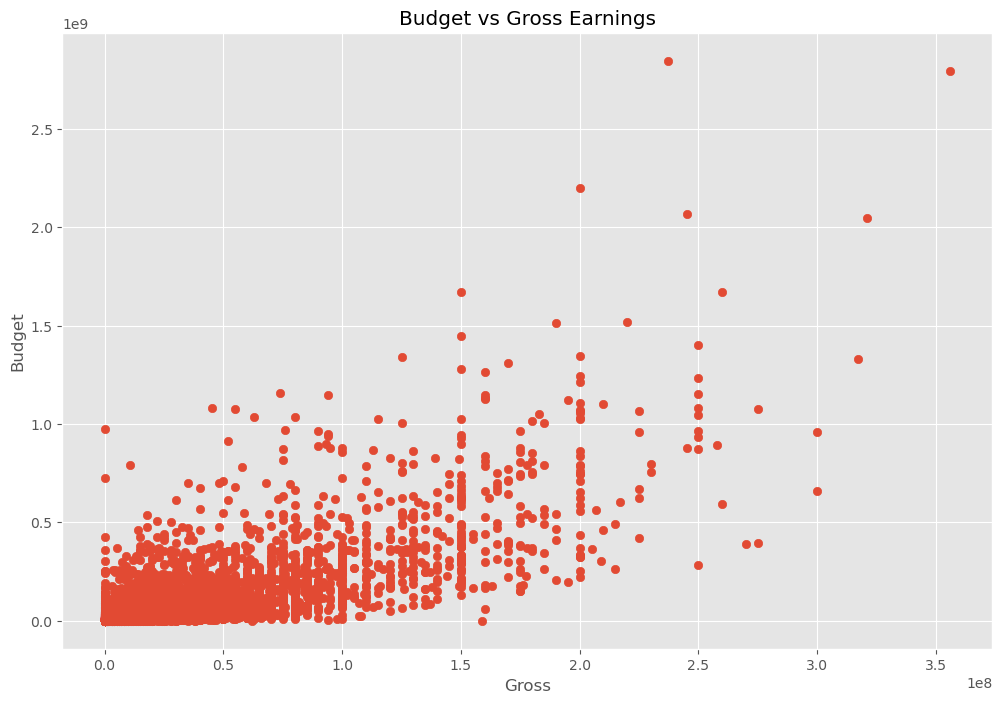

In [38]:
plt.scatter(x=df['budget'], y=df['gross'])
plt.ylabel('Budget')
plt.xlabel('Gross')
plt.title('Budget vs Gross Earnings')
plt.show()

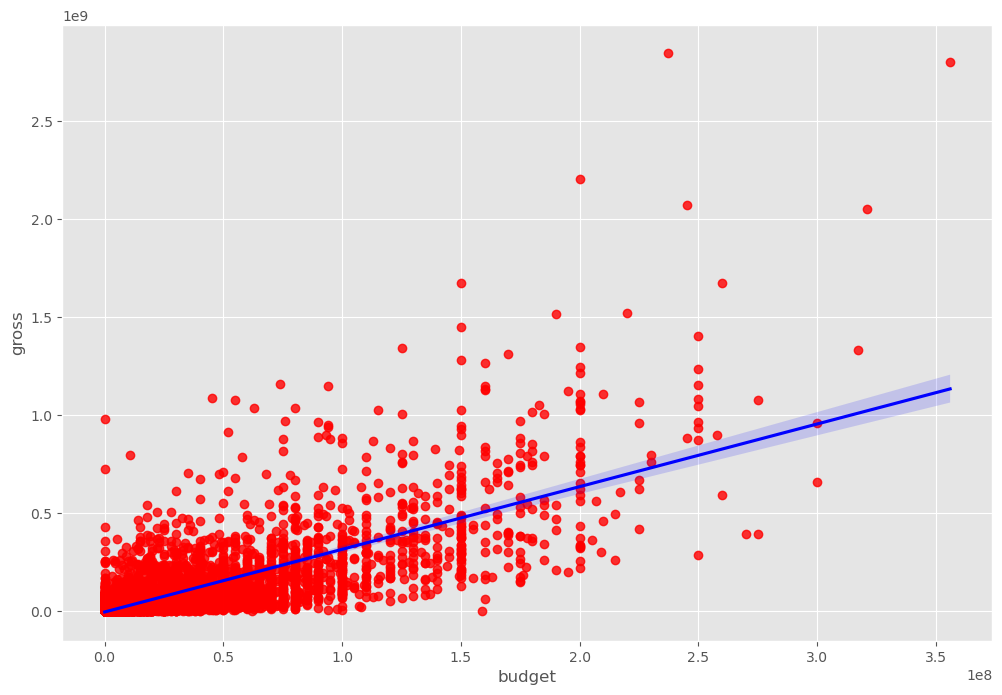

In [39]:
sns.regplot(x='budget', y='gross', data=df, scatter_kws={'color': 'red'}, line_kws = {'color': 'blue'})
plt.show()

In [40]:
df.corr(method = 'spearman', numeric_only=True)

,year,score,votes,budget,gross,runtime,month
year,1.000000,0.095848,0.465166,0.284256,0.297499,0.133069,-0.005166
score,0.095848,1.000000,0.434803,-0.012393,0.129759,0.398280,0.058620
votes,0.465166,0.434803,1.000000,0.591892,0.743122,0.281526,0.051518
budget,0.284256,-0.012393,0.591892,1.000000,0.711849,0.243790,0.064195
gross,0.297499,0.129759,0.743122,0.711849,1.000000,0.246503,0.031055
runtime,0.133069,0.398280,0.281526,0.243790,0.246503,1.000000,0.056983
month,-0.005166,0.058620,0.051518,0.064195,0.031055,0.056983,1.000000


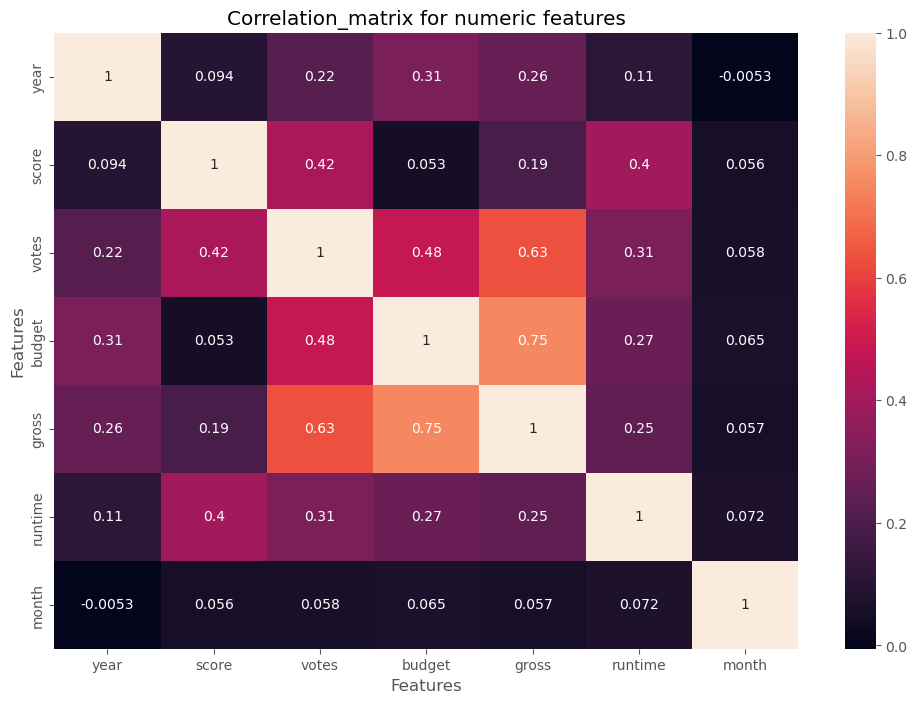

In [41]:
correlation_matrix = df.corr(method = 'pearson', numeric_only=True)

sns.heatmap(correlation_matrix, annot=True)
plt.ylabel('Features')
plt.xlabel('Features')
plt.title('Correlation_matrix for numeric features')

plt.show()

In [42]:
df_numerized = df.copy()

In [43]:
for col_name in df_numerized:
    if(df_numerized[col_name].dtype == 'object'):
        df_numerized[col_name] = df_numerized[col_name].astype('category')
        df_numerized[col_name] = df_numerized[col_name].cat.codes

In [44]:
df_numerized

,name,rating,genre,year,score,votes,director,writer,star,country,budget,gross,company,runtime,month
5445,515,5,0,2009,7.8,1100000,1107,1705,2198,53,237000000,2847246203,2115,162,12
7445,517,5,0,2019,8.4,903000,160,708,2107,53,356000000,2797501328,1508,181,4
3045,6668,5,6,1997,7.8,1100000,1107,1705,1502,53,200000000,2201647264,2115,194,12
6663,4958,5,0,2015,7.8,876000,1077,2448,494,53,245000000,2069521700,1446,138,12
7244,518,5,0,2018,8.4,897000,160,708,2107,53,321000000,2048359754,1508,149,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3394,2592,6,5,1998,6.1,2900,1866,1222,2032,52,-5,1672,1755,87,10
2906,4234,3,5,1996,7.4,37000,1959,1878,1419,11,-5,1605,319,110,8
3818,3237,6,4,2000,6.5,5200,705,1072,2183,52,-5,1400,451,103,2
7580,4491,3,5,2019,5.2,735,1391,2117,2143,53,-5,682,1869,93,6


In [45]:
df

,name,rating,genre,year,score,votes,director,writer,star,country,budget,gross,company,runtime,month
5445,Avatar,PG-13,Action,2009,7.8,1100000,James Cameron,James Cameron,Sam Worthington,United States,237000000,2847246203,Twentieth Century Fox,162,12
7445,Avengers: Endgame,PG-13,Action,2019,8.4,903000,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,356000000,2797501328,Marvel Studios,181,4
3045,Titanic,PG-13,Drama,1997,7.8,1100000,James Cameron,James Cameron,Leonardo DiCaprio,United States,200000000,2201647264,Twentieth Century Fox,194,12
6663,Star Wars: Episode VII - The Force Awakens,PG-13,Action,2015,7.8,876000,J.J. Abrams,Lawrence Kasdan,Daisy Ridley,United States,245000000,2069521700,Lucasfilm,138,12
7244,Avengers: Infinity War,PG-13,Action,2018,8.4,897000,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,321000000,2048359754,Marvel Studios,149,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3394,I Want You,R,Crime,1998,6.1,2900,Michael Winterbottom,Eoin McNamee,Rachel Weisz,United Kingdom,-5,1672,Polygram Filmed Entertainment,87,10
2906,Pusher,Not Rated,Crime,1996,7.4,37000,Nicolas Winding Refn,Jens Dahl,Kim Bodnia,Denmark,-5,1605,Balboa Entertainment,110,8
3818,"Love, Honor and Obey",R,Comedy,2000,6.5,5200,Dominic Anciano,Dominic Anciano,Sadie Frost,United Kingdom,-5,1400,British Broadcasting Corporation (BBC),103,2
7580,Run with the Hunted,Not Rated,Crime,2019,5.2,735,John Swab,John Swab,Ron Perlman,United States,-5,682,Roxwell Films,93,6


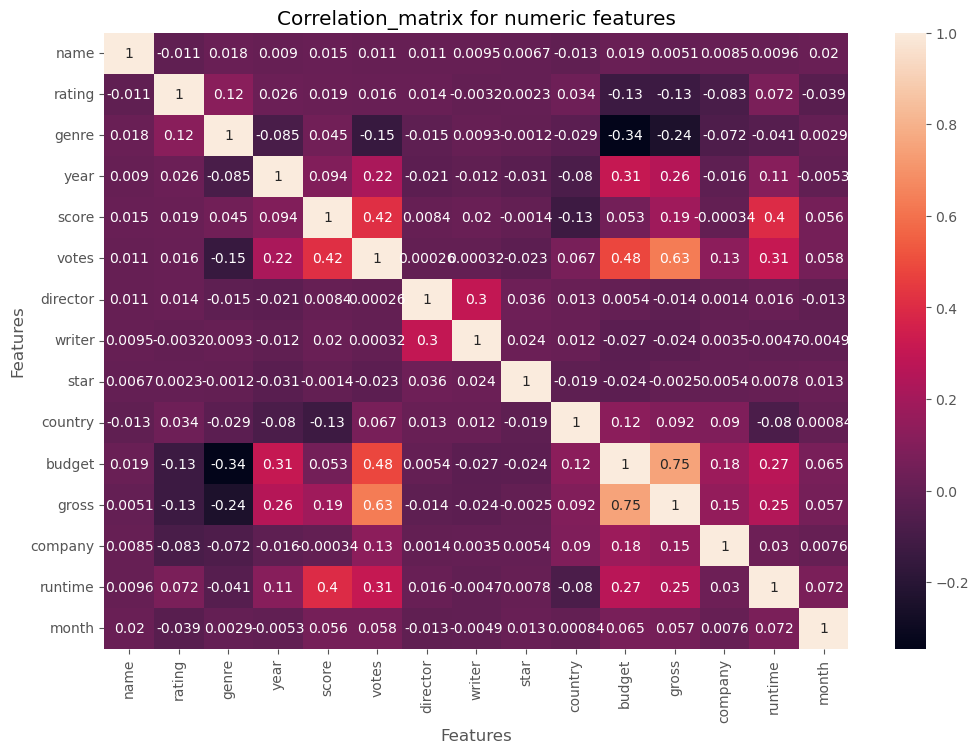

In [46]:
correlation_matrix = df_numerized.corr(method = 'pearson', numeric_only=True)

sns.heatmap(correlation_matrix, annot=True)
plt.ylabel('Features')
plt.xlabel('Features')
plt.title('Correlation_matrix for numeric features')

plt.show()

In [47]:
df_numerized.corr()

,name,rating,genre,year,score,votes,director,writer,star,country,budget,gross,company,runtime,month
name,1.000000,-0.010815,0.018363,0.008987,0.014970,0.011462,0.010575,0.009451,0.006731,-0.012544,0.018858,0.005135,0.008529,0.009563,0.019871
rating,-0.010815,1.000000,0.118600,0.025950,0.018596,0.016485,0.013653,-0.003234,0.002255,0.033607,-0.129627,-0.131786,-0.083083,0.072340,-0.038781
genre,0.018363,0.118600,1.000000,-0.084892,0.045478,-0.148120,-0.015227,0.009340,-0.001158,-0.029208,-0.344980,-0.242597,-0.071590,-0.040939,0.002870
year,0.008987,0.025950,-0.084892,1.000000,0.093951,0.218941,-0.021394,-0.011853,-0.031476,-0.080122,0.306915,0.258826,-0.015880,0.114237,-0.005344
score,0.014970,0.018596,0.045478,0.093951,1.000000,0.415190,0.008358,0.019710,-0.001386,-0.126497,0.053021,0.188071,-0.000342,0.397226,0.055971
votes,0.011462,0.016485,-0.148120,0.218941,0.415190,1.000000,0.000260,0.000323,-0.022542,0.066907,0.481902,0.631110,0.128127,0.309945,0.058353
director,0.010575,0.013653,-0.015227,-0.021394,0.008358,0.000260,1.000000,0.297126,0.036188,0.012726,0.005449,-0.014296,0.001379,0.015713,-0.012847
writer,0.009451,-0.003234,0.009340,-0.011853,0.019710,0.000323,0.297126,1.000000,0.024161,0.012415,-0.026762,-0.024021,0.003462,-0.004668,-0.004893
star,0.006731,0.002255,-0.001158,-0.031476,-0.001386,-0.022542,0.036188,0.024161,1.000000,-0.018838,-0.023673,-0.002451,0.005417,0.007827,0.013329
country,-0.012544,0.033607,-0.029208,-0.080122,-0.126497,0.066907,0.012726,0.012415,-0.018838,1.000000,0.123439,0.091951,0.089754,-0.079525,0.000837


In [48]:
corr_mat = df_numerized.corr()

corr_pairs = corr_mat.unstack()

In [49]:
threshold = 0.5 # Selected correlation threshold
filtered_corr = corr_mat[abs(corr_mat) > threshold].unstack().dropna()
filtered_corr = filtered_corr.sort_values()

filtered_corr

gross     votes       0.63111
votes     gross       0.63111
gross     budget      0.74933
budget    gross       0.74933
name      name        1.00000
company   company     1.00000
gross     gross       1.00000
budget    budget      1.00000
country   country     1.00000
star      star        1.00000
writer    writer      1.00000
director  director    1.00000
votes     votes       1.00000
score     score       1.00000
year      year        1.00000
genre     genre       1.00000
rating    rating      1.00000
runtime   runtime     1.00000
month     month       1.00000
dtype: float64

As we can see - pir of features 'gross' and 'voteds' / 'budget' and 'gross' are highly correlated with each other.